#### TS including a three-component noncovalent complex from SMILES, create ORCA input files, CSEARCH with CREST

###### Step 1: creating SMILES with predefined atom numbers and setting constrains

[Cl-:5].[F:3][C:4]([H:6])([H:7])[H:8]


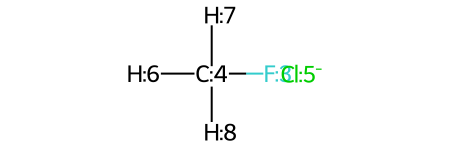

In [2]:
import glob
from rdkit import Chem                                                                                                                                                         
from aqme.csearch import csearch
from aqme.qprep import qprep

smi = 'FC.[Cl-]'
mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)
for i,atom in enumerate(mol.GetAtoms()):
    atom.SetAtomMapNum(i+3) 
# mapped SMILES to use in CSEARCH
smi_new = Chem.MolToSmiles(mol)

print(smi_new)
mol

In [ ]:
# based on the atom numbers above, I choose the constraints for my TS:
# 1) Bond between atoms 4 and 5 with a distance of 1.8 A
# 2) Bond between atoms 5 and 9 with a distance of 1.8 A
constraits_dist = [[3,4,1.8],[4,5,1.8]]

# 3) Angle between atoms 4, 5 and 9 of 180 degrees
constraits_angle = [[3,4,5,180]]

###### Step 2: doing CSEARCH

In [ ]:
# run CSEARCH conformational sampling, specifying:
# 1) Mapped SMILES string (smi=smi_new)
# 2) CREST sampling (program='crest')
# 3) Include CREGEN post-analysis (cregen=True)
# 4) Define distance constraints (constraints_dist=constraits_dist)
# 5) Define angle constraints (constraints_angle=constraits_angle)
# 6) Add water solvation in CREST (crest_keywords="--alpb h2o")
# 7) Add water solvation in the xTB pre-optimization (xtb_keywords="--alpb h2o")
# 7) Number of processors used in CREST (nprocs=12)
csearch(smi=smi_new,name='TS-example',program='crest',cregen=True,
        constraints_dist=constraits_dist,constraints_angle=constraits_angle,
        crest_keywords="--alpb h2o",xtb_keywords="--alpb h2o",nprocs=12)

###### Step 3: Writing Gaussian input files with the SDF files obtained from CSEARCH

In [ ]:
# set SDF filenames and directory where the new com files will be created
sdf_rdkit_files = glob.glob(f'CSEARCH/*.sdf')

# run QPREP input files generator, with:
# 1) Files to convert (files=sdf_rdkit_files)
# 2) QM program for the input (program='gaussian')
# 3) Keyword line for the Gaussian inputs (qm_input='wb97xd/6-31+G* opt=(calcfc,ts,noeigen) freq')
# 4) Memory to use in the calculations (mem='24GB')
# 5) Processors to use in the calcs (nprocs=8)
qprep(files=sdf_rdkit_files,program='gaussian',
        qm_input='wb97xd/6-31+G* opt=(calcfc,ts,noeigen) freq',mem='24GB',nprocs=8)